## **TESTES DE NORMALIDADE**

Vários métodos de estimação e testes de hipóteses foram criados sob a suposição de que a amostra aleatória tenha distribuição normal

In [1]:
import numpy as np
import pandas as pd

In [2]:
enem_sp = pd.read_csv('/content/drive/MyDrive/Cursos_Udemy/curso_estatistica_python/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')

In [3]:
enem_tupa = enem_sp.loc[enem_sp.NO_MUNICIPIO_RESIDENCIA == 'Tupã']

In [4]:
enem_tupa.shape

(524, 28)

In [6]:
enem_tupa.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
1623,"1,90E+11",Tupã,19,F,1,branca,1,1,não_respondeu,NaN,NaN,1,1,1,1,465.3,578.4,543.6,42.7,Inglês,1.0,120.0,120.0,120.0,120.0,100.0,580.0,Sim
2281,"1,90E+11",Tupã,19,M,1,branca,1,1,não_respondeu,NaN,NaN,1,1,1,1,598.5,533.4,579.8,656.8,Inglês,1.0,140.0,140.0,140.0,200.0,180.0,800.0,Sim
5493,"1,90E+11",Tupã,18,F,1,branca,2,2,pública,NaN,NaN,1,1,1,1,492.3,518.4,550.9,515.6,Espanhol,1.0,160.0,120.0,140.0,120.0,100.0,640.0,Sim
7465,"1,90E+11",Tupã,19,M,1,branca,1,1,não_respondeu,NaN,NaN,1,1,1,1,576.7,539.4,562.8,628.4,Inglês,1.0,140.0,160.0,160.0,180.0,160.0,800.0,Sim
7898,"1,90E+11",Tupã,28,M,1,branca,1,1,não_respondeu,NaN,NaN,1,1,1,1,61.0,650.5,562.8,701.5,Inglês,1.0,120.0,160.0,120.0,120.0,140.0,660.0,Sim


TESTES DE NORMALIDADE

Existem testes de normalidade numéricos e testes gráficos:

Shapiro-Wilk (limite de 5000 amostras)

Kolmogorov_Smirnov

Histograma 

QQplot

### Histograma

In [8]:
import plotly.express as px
grafico =  px.histogram (enem_sp,  x = "NOTA_REDACAO", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas de Redação') 
grafico.show()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
import plotly.express as px
grafico =  px.histogram (enem_tupa,  x = "NOTA_REDACAO", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas de Redação') 
grafico.show()

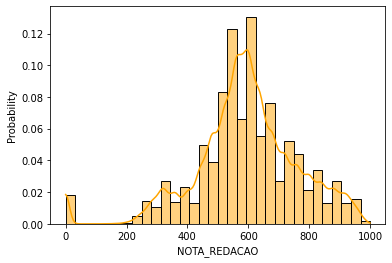

In [10]:
import seaborn as sns
sns.histplot(enem_sp, x='NOTA_REDACAO', bins=32, color="orange", kde=True, stat="probability");

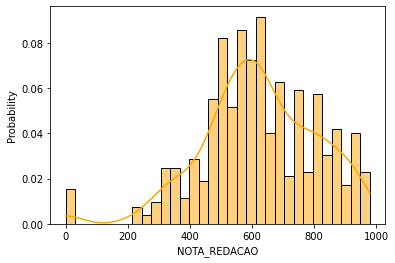

In [11]:
sns.histplot(enem_tupa, x='NOTA_REDACAO', bins=32, color="orange", kde=True, stat="probability");

### QQPLOT

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt

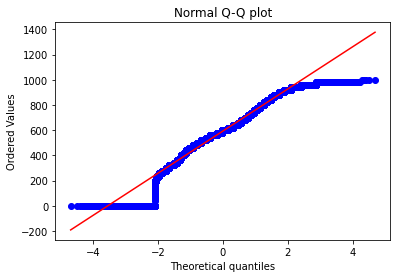

In [13]:
stats.probplot(enem_sp['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

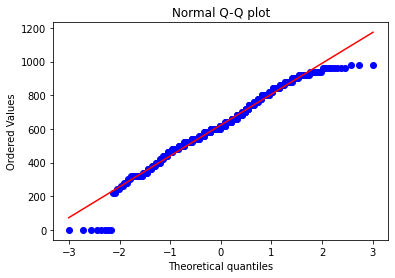

In [14]:
stats.probplot(enem_tupa['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

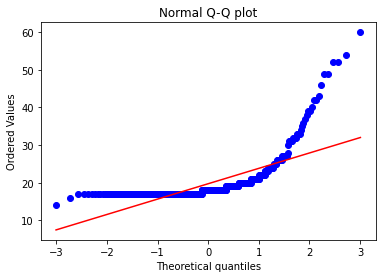

In [15]:
stats.probplot(enem_tupa['IDADE'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

### Teste de Shapiro-Wilk

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [16]:
stats.shapiro(enem_sp.NOTA_REDACAO)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.9648149609565735, 0.0)

O teste de Shapiro_Wilk não se aplica a dados maiores que 5000.

In [17]:
stats.shapiro(enem_tupa.NOTA_REDACAO)

(0.9733085632324219, 3.542090354358152e-08)

### Teste Lilliefors (Kolmogorov-Smirnov)

In [18]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [19]:
statsmodels.stats.diagnostic.lilliefors(enem_sp.NOTA_REDACAO, dist = 'norm')

(0.0831243667968013, 0.0)

In [20]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(enem_tupa.NOTA_REDACAO, dist = 'norm')

(0.053966451207192984, 0.0009506576433967928)